In [1]:
import os
import requests
import pandas as pd
from matplotlib import pyplot as plt


def fetch_mpg_data():
    url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
    local_file_path = './data/auto_mpg_data.data'
    
    column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                    'Acceleration', 'Model Year', 'Origin', 'Car Name']
    
    if not os.path.exists(local_file_path):
        response = requests.get(url)
        
        if response.status_code == 200:
            data = response.text
            # Save the data to a local file
            with open(local_file_path, 'w') as file:
                file.write(data)
            print("Data saved to:", local_file_path)
        else:
            print("Failed to fetch data. Status code:", response.status_code)
            return None
    
    # Load the data from the local file
    df = pd.read_csv(local_file_path, sep='\s+', names=column_names, na_values='?')
    return df

# Example usage
df = fetch_mpg_data()
if df is not None:
    display(df.head())

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


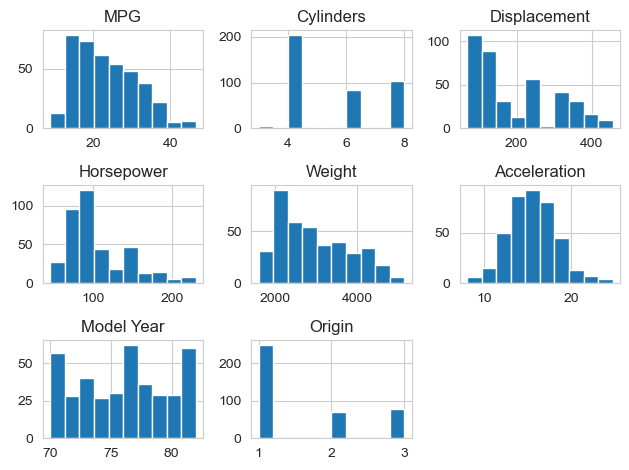

In [2]:
df.select_dtypes(include=['number']).hist()
plt.tight_layout()
plt.show()

In [3]:
import tensorflow.keras as keras
from tensorflow.keras import layers

model